<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Normalization & PCA</h1>
<br>

- Single cell data is messy. It often contains noise from technical artefacts, batch effects, and other confounders. Before analyzing our data, we need to assess and correct for as much of this unwanted variation as possible.

- We'll focus on the most fundamental sources of unwanted variation, and simple but effective ways to handle this.
<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Normalization</h1>

- Dimensionality reduction methods seek to take a large set of variables and return a smaller set of components that still contain most of the information in the original dataset.

- One of the simplest forms of dimensionality reduction is PCA. Principal component analysis (PCA) is a mathematical procedure that transforms a number of possibly correlated (e.g., expression of genes in a network) variables into a (smaller) number of uncorrelated variables called principal components ("PCs").

- Biologically, this type of dimensionality reduction is useful and appropriate because cells respond to their environment by turning on regulatory programs that result in expression of modules of genes. As a result, gene expression displays structured co-expression, and dimnesionality reduction by principle component analysis groups those co-varying genes into principle components, ordered by how much variation they explain.

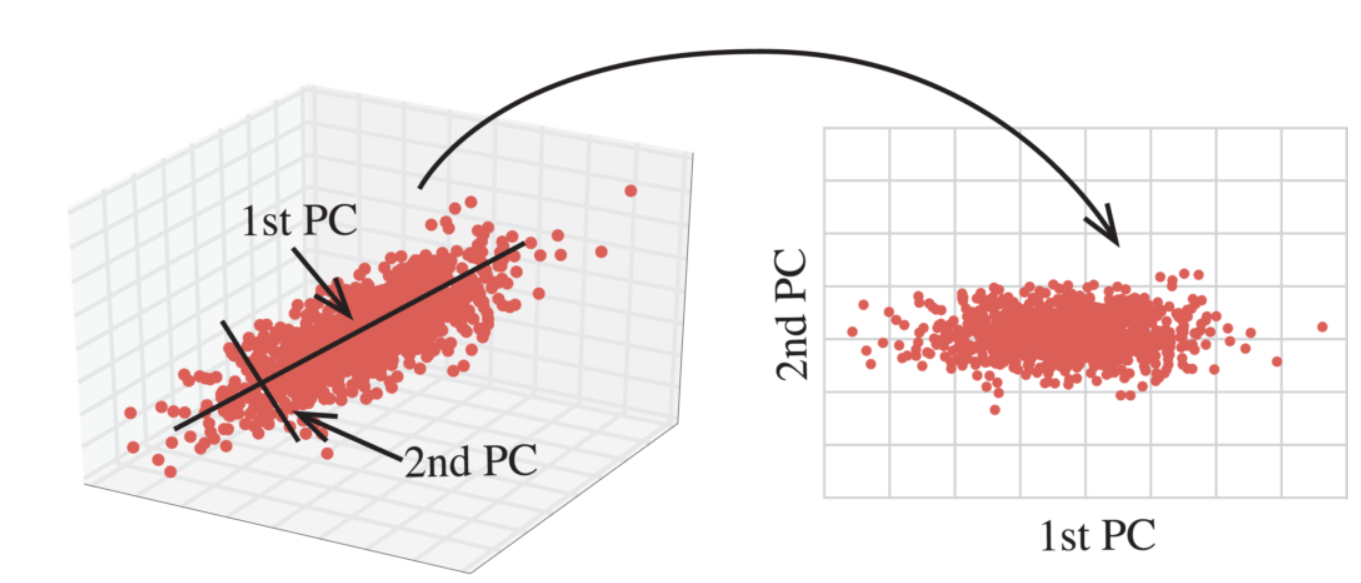

### Installations

In [1]:
import scanpy as sc # import scanpy to handle our AnnData 
import pandas as pd # import pandas to handle dataframes
import matplotlib.pyplot as plt # import matplotlib to visualize our qc metrics

# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

### Loading the Quality controlled data

In [2]:
adata = sc.read("/home/chrf/Desktop/CHRF_Project/Single_cell/Single_cell_RNA_seq_analysis_of_Tabula_Muris_data_github_Aayush_Sharma/output/brain_qc.h5ad")

Now that we have a clean expression matrix, we can use PCA to visualize an overview of the data and assess confounding factors. SCANPY provides several very useful functions to simplify visualisation.

Let's first peek at our data before normalization:

In [3]:
adata.X.shape

(3210, 18585)

/home/chrf/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


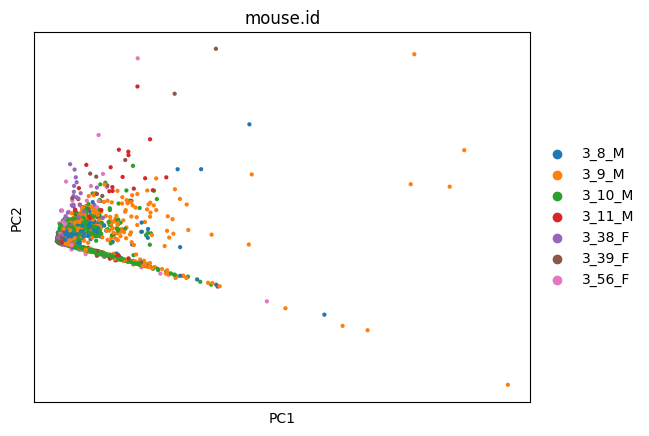

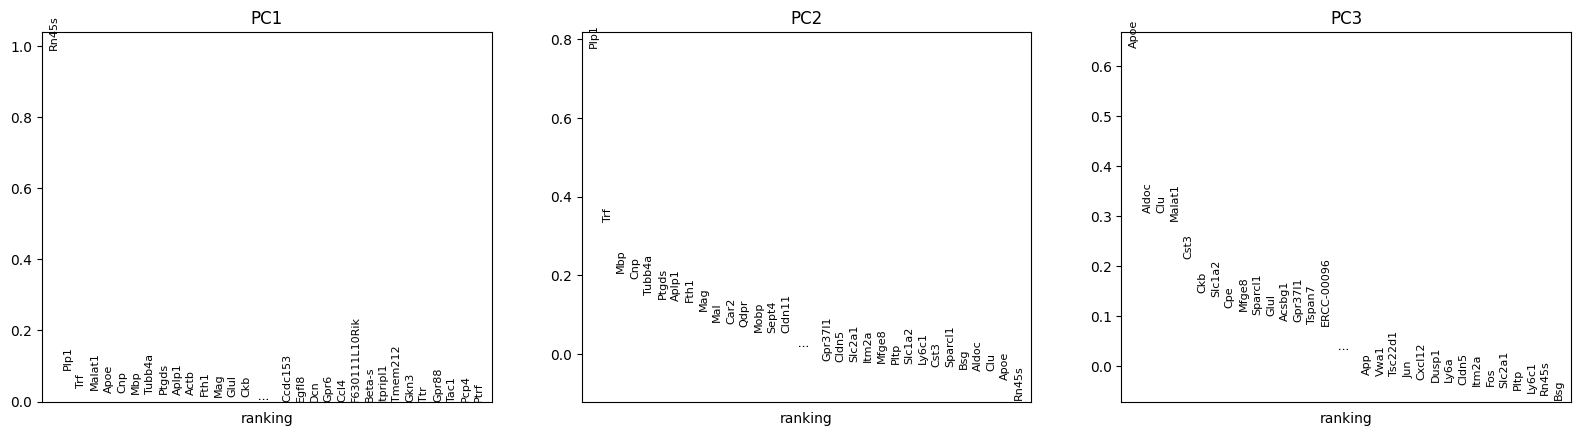

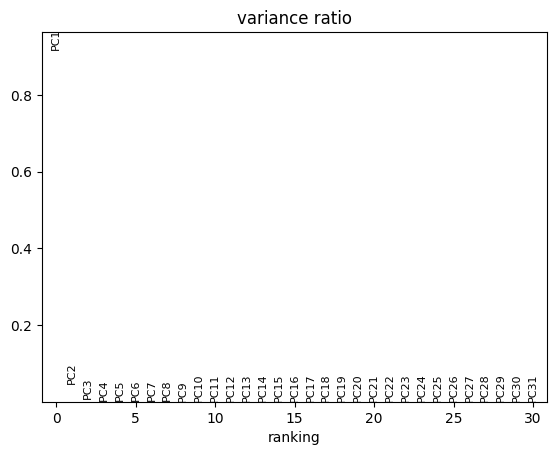

In [4]:
sc.pp.pca(adata)  # applies pca on adata and adds results of pca in adata in .obsm, .varm, .uns
sc.pl.pca_overview(adata, color='mouse.id')  # plot the pca results with color as mouse.id 

The first plot has a strange, very linear first PC (which captures the most variation in the dataset). This suggests that we have outliers in our data.

The next row of plots shows the loadings, which indicate how strongly each variable in the original data contributes to each principle component. Here, we see that the first PC is strongly determined by the expression of just a small number of genes.

The bottom plot shows us that the first principle component captures the vast majority of the variation in the raw data, and that a single gene dominates the variation in that component.

In [5]:
adata.uns
# adata.uns['pca']['variance_ratio'] - Ratio of explained variance.
# adata.uns['pca']['variance'] - Explained variance, equivalent to the eigenvalues of the covariance matrix.

OverloadedDict, wrapping:
	OrderedDict([('pca', {'params': {'zero_center': True, 'use_highly_variable': False}, 'variance': array([7.5778171e+10, 3.8194253e+09, 6.9450099e+08, 3.0848448e+08,
       2.6322752e+08, 2.1384618e+08, 1.7025266e+08, 1.3616723e+08,
       8.2641584e+07, 5.9008440e+07, 4.8047260e+07, 4.6198500e+07,
       4.1371868e+07, 3.1640162e+07, 3.0767324e+07, 2.8293024e+07,
       2.5999966e+07, 2.2749750e+07, 2.1087486e+07, 1.8888046e+07,
       1.6900648e+07, 1.5758131e+07, 1.4826157e+07, 1.3796442e+07,
       1.3365383e+07, 1.1948486e+07, 1.1131892e+07, 1.0620590e+07,
       1.0337813e+07, 9.8309600e+06, 8.6534970e+06, 8.3052010e+06,
       7.7238955e+06, 7.6195230e+06, 7.3286630e+06, 6.9121455e+06,
       6.7855395e+06, 6.1467870e+06, 6.0744240e+06, 5.8812080e+06,
       5.5702870e+06, 5.4213925e+06, 5.3397780e+06, 5.0847540e+06,
       4.9023410e+06, 4.7942585e+06, 4.6452620e+06, 4.3462060e+06,
       4.2363270e+06, 4.2056335e+06], dtype=float32), 'variance_ratio': 

In [6]:
print(adata.varm['PCs'].shape)
adata.varm['PCs']
# .varm['PCs'] - The principal components containing the loadings.

(18585, 50)


array([[ 3.94729966e-07, -1.08410143e-06,  5.02053854e-06, ...,
         1.23705759e-05, -5.55430915e-06,  8.34440380e-06],
       [ 5.04029158e-04,  7.00702949e-04,  3.00280098e-03, ...,
         2.04373174e-03,  1.42754437e-02, -6.23742817e-03],
       [ 9.63721832e-05, -1.56600232e-04, -1.34455157e-04, ...,
         5.91202406e-03,  5.15832612e-03, -6.89312117e-03],
       ...,
       [ 6.28579292e-05,  8.21348222e-05,  1.00799516e-04, ...,
        -1.86742819e-03,  1.76026556e-03,  5.49905561e-03],
       [ 4.99971975e-08, -2.79154136e-07, -4.34063878e-07, ...,
        -4.06621712e-06, -4.97120709e-06,  3.38385598e-06],
       [ 2.24476767e-04, -1.46512466e-04,  1.68350630e-03, ...,
        -1.51966873e-03, -4.50229226e-03, -4.31561330e-03]], dtype=float32)

In [7]:
print(adata.obsm['X_pca'].shape)
adata.obsm['X_pca']
# .obsm['X_pca'] - PCA representation of data.

(3210, 50)


array([[-1.8424180e+05, -1.3552837e+04,  2.3974739e+03, ...,
         1.5602520e+03, -6.8144830e+02,  4.2358852e+01],
       [-1.6474683e+05, -1.9324463e+04,  5.1528000e+04, ...,
        -1.3172363e+03, -3.1715854e+03,  2.7396309e+03],
       [ 9.0673076e+03,  8.0857070e+04,  6.4449180e+03, ...,
        -2.2793311e+03,  4.0826172e+02, -5.2319214e+02],
       ...,
       [-1.8081131e+05, -1.4365059e+04, -4.0253335e+03, ...,
        -6.0870703e+02, -7.2793170e+02, -5.0457053e+02],
       [-4.4791934e+04,  1.3990076e+04, -3.5562561e+03, ...,
        -6.0536475e+02,  4.4197578e+01, -4.8476660e+02],
       [-1.8489553e+05, -1.4003929e+04,  2.1834360e+03, ...,
        -9.9000168e+01, -7.8817467e+01,  4.2163750e+01]], dtype=float32)

# Normalizing cell library size 

- Major factor that contributes variation to single-cell RNA-sequencing experiments is "Library size variation". Library sizes vary for many reasons, including natural differences in cell size, variation of RNA capture, variation in the efficiency of PCR amplification used to generate enough RNA to create the sequencing library. 

- In addition, scRNA-seq data is sequenced on highly multiplexed platforms therefore the total reads which are derived from each cell may differ substantially.

- This means that there are lot of technical variations than biological and that is why cell are commonly normalized to have comparable RNA content. 

- However, it is important to note that all reasoning about differences between cells after this normalization occurs is restricted to asking question about the relative, not absolute, abundance of RNA in one cell vs another.

- Some quantification methods (eg. Cufflinks, RSEM) incorporate library size when determining gene expression estimates and thus do not require this normalization while other quantification methoda require library size correction.

- There are two main approaches to this correction. Many methods use a **simple linear scaling to adjust counts such that each cell (row) has about the same total library size. Examples include converting to counts per million (CPM) and closely related methods such as scran. While simple, these approaches do a reasonable job of correcting for differences in library size.**

- Other methods are more complex which are useful when there are more complex sources of unwanted variation (e.g., for highly heterogeneous populations of cells with different sizes).

- Here, we'll stick to the simple, **linear scaling methods**. 

## CPM 
The simplest way to normalize this data is to convert it to counts per million (CPM) by **dividing each row by a size factor (the sum of all counts in the row), then multiplying by 1,000,000.** Note that this method assumes that each cell originally contained the same amount of RNA.

In [8]:
adata_cpm = adata.copy()  # apply this to a copy so we can compare methods
adata_cpm.raw = adata_cpm  # store a copy of the raw values before normalizing
sc.pp.normalize_per_cell(adata_cpm, 
                         counts_per_cell_after=1e6)
# Returns or updates adata with normalized version of the original adata_cpm.X

Now, applying **PCA** on normalized data.

/home/chrf/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


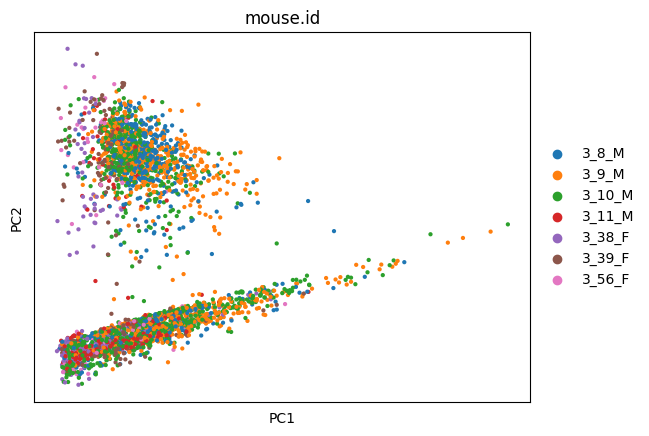

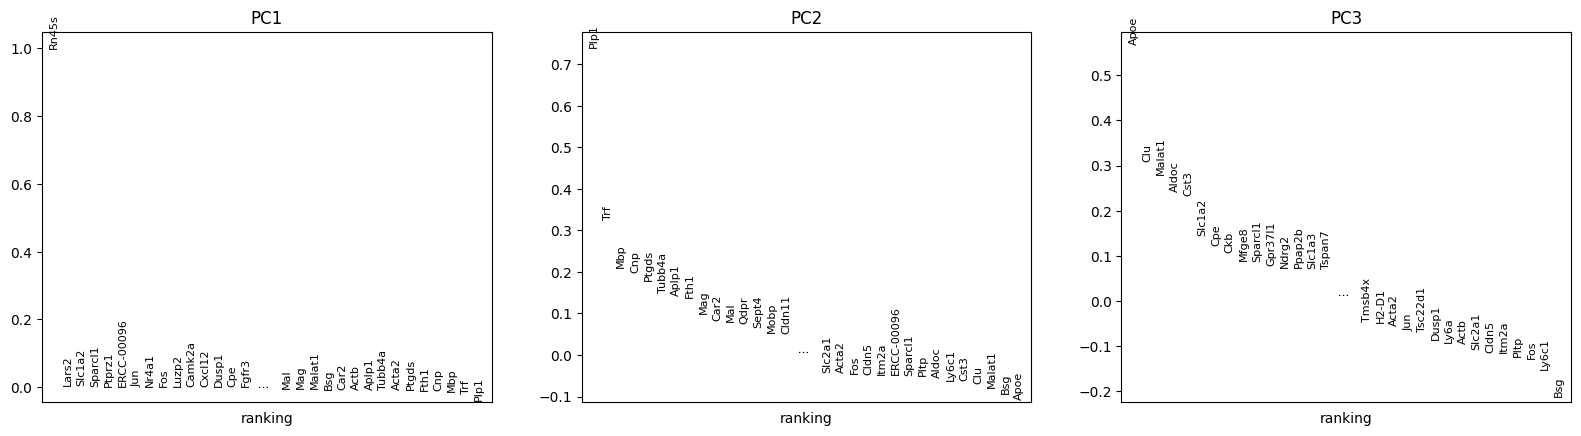

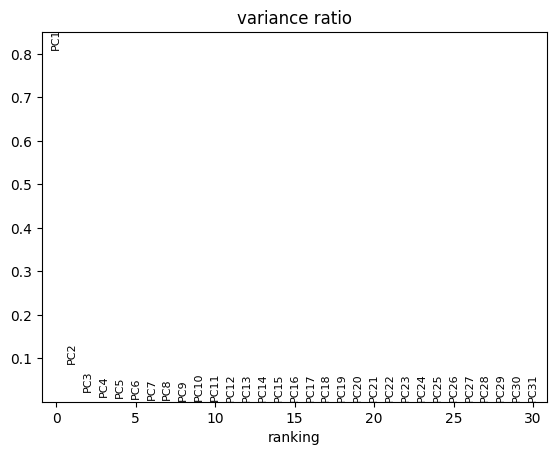

In [9]:
sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm, color='mouse.id')

- A potential drawback of CPM is if your sample contains genes that are both very highly expressed and differentially expressed across the cells. In this case, the total molecules in the cell may depend of whether such genes are on/off in the cell and normalizing by total molecules may hide the differential expression of those genes and/or falsely create differential expression for the remaining genes. 
- One way to mitigate this is to exclude highly expressed genes from the size factor estimation.

<b>Normalize with counts per million, excluding highly expressed genes from the size factor calculation</b> : 

**Normalize each cell by total counts over all genes, so that every cell has the same total count after normalization.** If choosing target_sum=1e6, this is CPM normalization.

/home/chrf/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


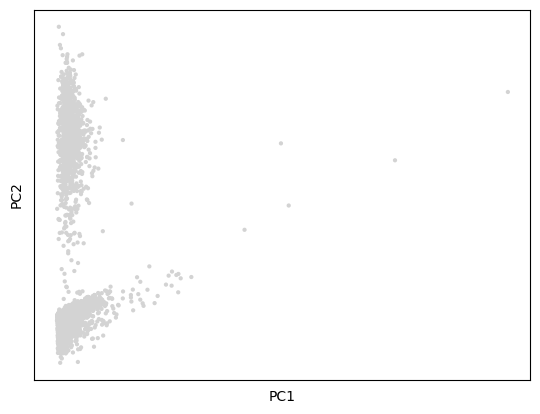

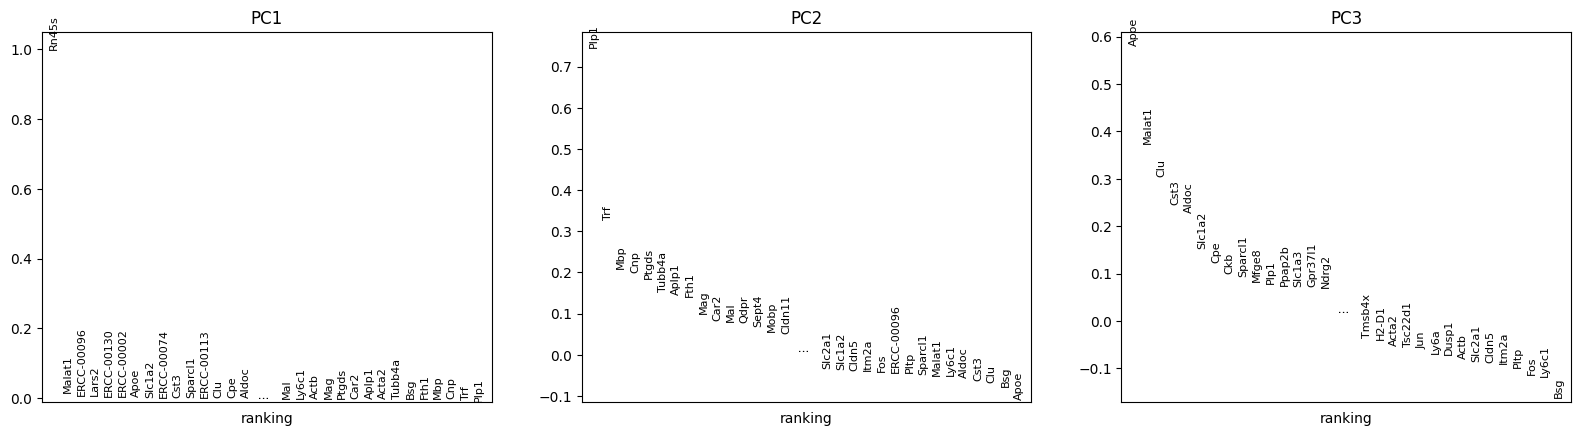

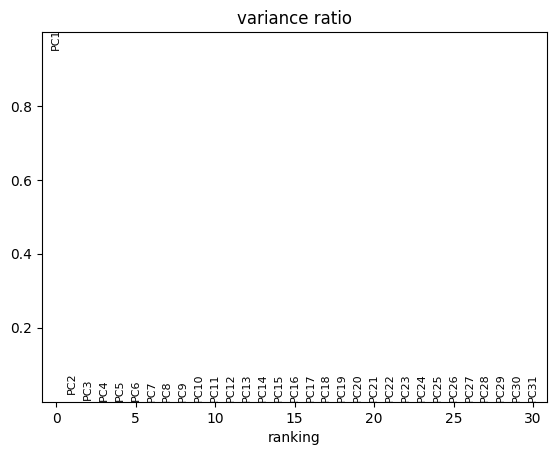

In [10]:
adata_cpm_ex = adata.copy() # make a copy so we can compare results
sc.pp.normalize_total(adata_cpm_ex, target_sum=1e6, exclude_highly_expressed=True) # normalize
sc.pp.pca(adata_cpm_ex) # run pca
sc.pl.pca_overview(adata_cpm_ex) # plot pca

This is more reasonable than before: the second component now explains some of the variance.

Other linear approaches to correcting for library size include:

- Downsampling, which randomly samples reads from each cell until a set threshold is reached
- RPKM and related methods, which correct for transcript length

# Normalizing gene expression 
- As we saw earlier, this dataset is dominated by one or more highly expressed genes. 
- One thing to test is to determine if the **offending gene, Rn45s**, when removed, yields a more reasonable analysis. This can be assessed by removing the gene and re-running PCA.

/home/chrf/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


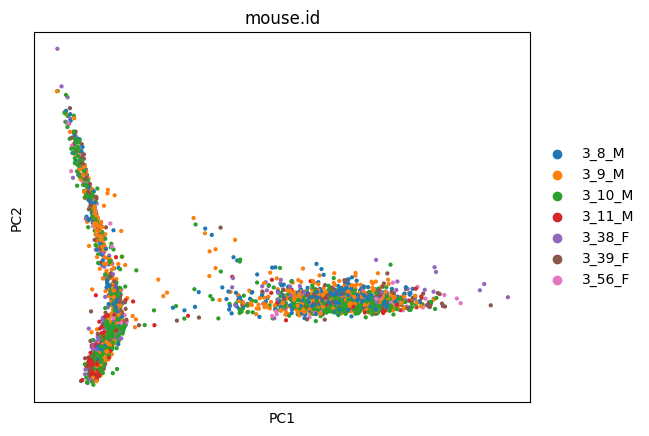

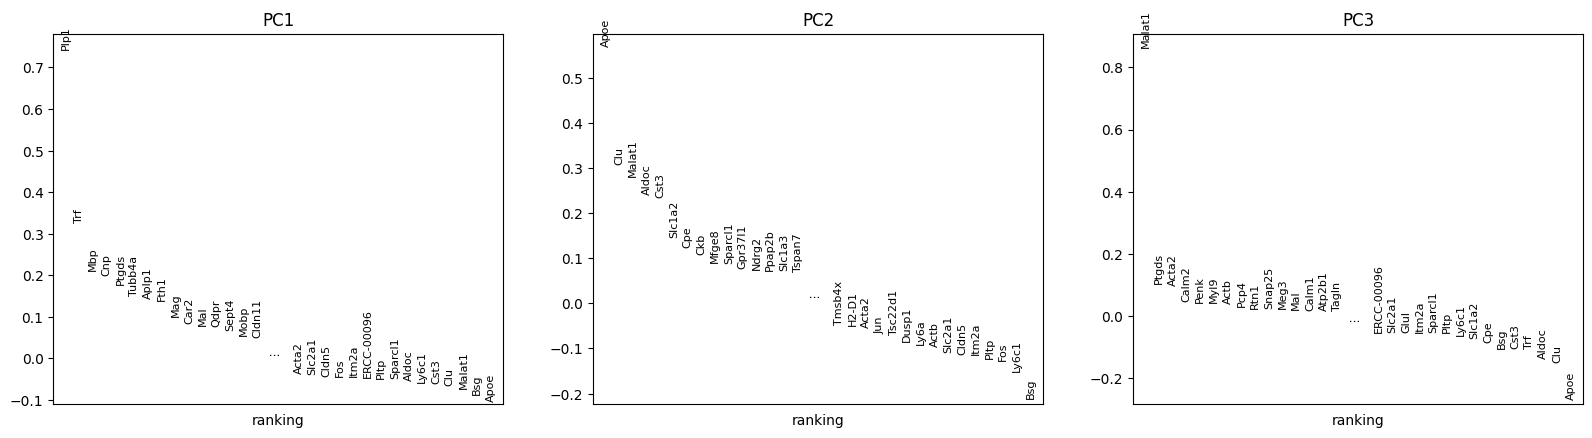

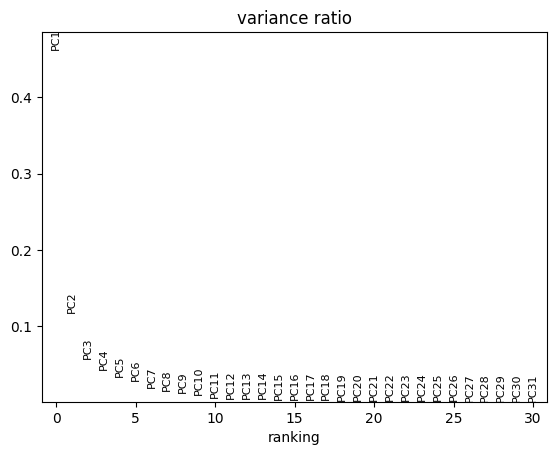

In [11]:
not_Rn45s = adata_cpm.var.index != 'Rn45s'
adata_no_Rn45s = adata_cpm[:, not_Rn45s]

sc.pp.pca(adata_no_Rn45s)
sc.pl.pca_overview(adata_no_Rn45s, color='mouse.id')

In [12]:
adata_no_Rn45s.shape, adata.shape  # 1 gene is removed

((3210, 18584), (3210, 18585))

<b>This makes things slightly better.</b> 

- There are now other genes in PC1 that contribute meaningfully to its loading, and PC1 is no longer the only component that contributes significant variation. 

- However, it's obvious from looking at the genes that we would likely have to remove a few more before we'd get more equal contribution from large numbers of genes, and there could be low-expression genes, such as transcription factors, which are really informative of cell state, but are masked by the expression of other, more highly expressed genes.

- Another way to more systematically address this is by centering and scaling the gene expression values (you may remember a "z-score" from stats class). Importantly, doing this places an equal weight on each gene for downstream analysis. Depending on your biological question, this may or may not be appropriate. The advantage of doing so, however, is that it de-emphasizes the small handful of genes that are differentially expressed at high levels, which are currently dominating the data.

- <b>First, we take the log(1+x) of each value. The +1 makes sure that 0 values in the original data still map to 0 in log space (and prevents us from trying to take the log of 0). This makes the expression values more closely approximate a Gaussian distribution, which is an assumption inherent to many downstream analysis methods.</b>

- <b>Then for each gene, we subtract the mean expression value and divide by the standard deviation.</b>

/home/chrf/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


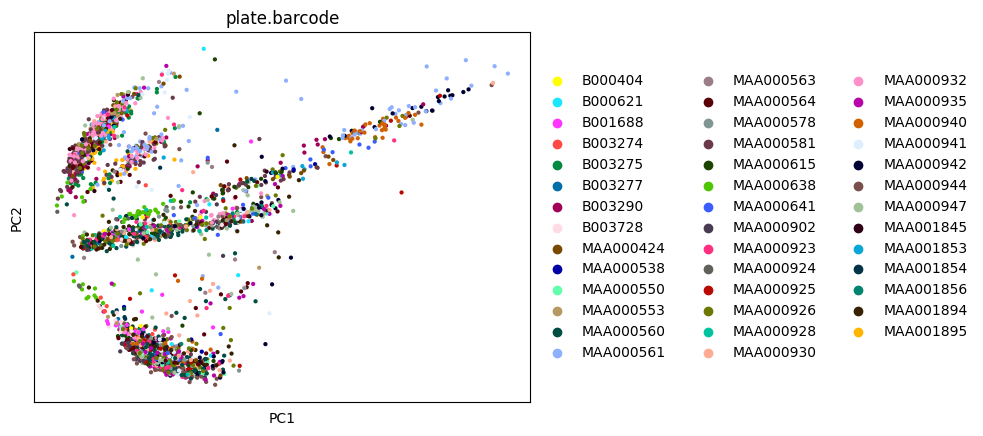

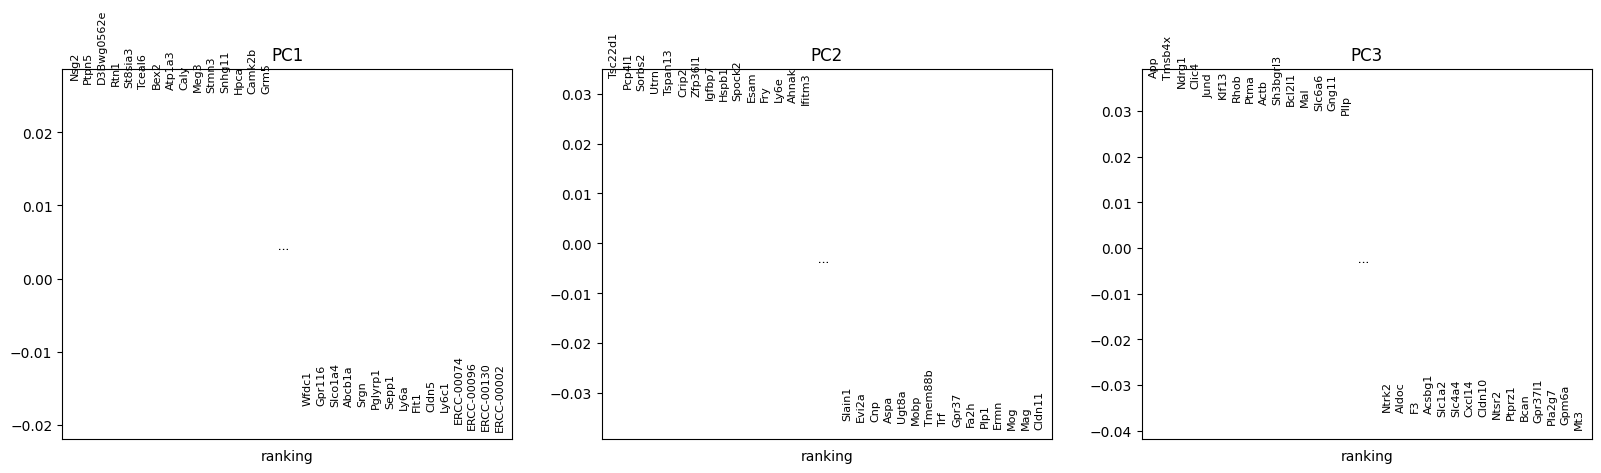

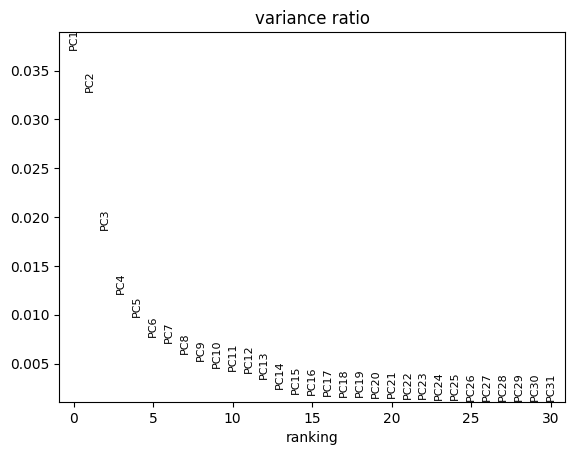

In [13]:
sc.pp.log1p(adata_cpm)  # Returns or updates data, depending on copy. X = log(X + 1) 
sc.pp.scale(adata_cpm)  # Scale data to unit variance and zero mean.
# updates adata with a scaled adata.X, annotated with 'mean' and 'std' in adata.var.
sc.pp.pca(adata_cpm)  
sc.pl.pca_overview(adata_cpm, color='plate.barcode')

This looks much better: the first plot shows more Gaussian-looking groups of cells. The second row of plots shows well-distributed loadings, indicating that each PC is driven by multiple genes. And the final plot shows that Each of the first ~5-10 components captures some of the variance in the data.

Let's write our normalized data to file for later use.

### Saving the Normalized adata

In [14]:
adata_cpm.write('/home/chrf/Desktop/CHRF_Project/Single_cell/Single_cell_RNA_seq_analysis_of_Tabula_Muris_data_github_Aayush_Sharma/output/brain_normalized.h5ad')  # saving the 1 with log1p normalization

In [16]:
!zip "/home/chrf/Desktop/CHRF_Project/Single_cell/Single_cell_RNA_seq_analysis_of_Tabula_Muris_data_github_Aayush_Sharma/output/brain_normalized.zip" "/home/chrf/Desktop/CHRF_Project/Single_cell/Single_cell_RNA_seq_analysis_of_Tabula_Muris_data_github_Aayush_Sharma/output/brain_normalized.h5ad"

updating: home/chrf/Desktop/CHRF_Project/Single_cell/Single_cell_RNA_seq_analysis_of_Tabula_Muris_data_github_Aayush_Sharma/output/brain_normalized.h5ad (deflated 47%)


<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Summary</h1>
<br>
<b>Tried various approaches for Normalization and PCA:</b>

- Directly applying PCA on adata
- Applying CPM normalization and then PCA
- Normalizing each cell by total counts over all genes and **excluding highly_expressed genes** and then PCA
- Removing offending gene Rn45s and then PCA
- **Final**, Normalization by log1p and scaling and then PCA.
- Saving the data by Final approach

https://chanzuckerberg.github.io/scRNA-python-workshop/preprocessing/01-basic-qc.html